In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
path = "C:\\Users\\anjal\\Downloads\\renttherunway.csv"
data = pd.read_csv(path)

# Check the first few samples, shape, and info of the data
print(data.head())
print(data.shape)
print(data.info())


   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

In [2]:
# First few samples
print(data.head())

# Shape of the data
print(data.shape)

# Information about the data
print(data.info())


   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

In [3]:
# Check for duplicates
duplicate_records = data.duplicated().sum()
print(f"Number of duplicate records: {duplicate_records}")

# Drop duplicates
data = data.drop_duplicates()


Number of duplicate records: 0


In [4]:
# Drop columns like 'user_id', 'item_id', and 'review_text'
data = data.drop(columns=['user_id', 'item_id', 'review_text'])


In [5]:
# Remove 'lbs' suffix and convert to float
data['weight'] = data['weight'].str.replace('lbs', '').astype(float)


In [17]:
import pandas as pd

# Assuming the dataset is loaded into a DataFrame named 'data'
path = "C:\\Users\\anjal\\Downloads\\renttherunway.csv"

# Check the data types
print(data.dtypes)

# Handle missing values in 'height' column and convert to inches
def convert_height(height):
    if isinstance(height, str):
        feet, inches = height.split("'")
        return int(feet) * 12 + int(inches.replace('"', ''))
    return None

# Apply conversion and handle missing values in height
data['height'] = data['height'].apply(convert_height)
data['height'].fillna(data['height'].mean(), inplace=True)

# Convert weight to numeric, forcing errors to NaN
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

# Fill missing values in 'weight' with the mean weight
data['weight'].fillna(data['weight'].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
data['bust_size'].fillna(data['bust_size'].mode()[0], inplace=True)
data['body_type'].fillna(data['body_type'].mode()[0], inplace=True)

# Fill missing values in rating with the mean rating
data['rating'].fillna(data['rating'].mean(), inplace=True)

# Fill missing values in review_text with an empty string
data['review_text'].fillna('', inplace=True)

# Fill missing values in review_summary with an empty string
data['review_summary'].fillna('', inplace=True)

# Fill missing values in age with the mean age
data['age'].fillna(data['age'].mean(), inplace=True)

# Convert user_id, item_id to string if they are not already
data['user_id'] = data['user_id'].astype(str)
data['item_id'] = data['item_id'].astype(str)

# Verify that there are no missing values left
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check the first few rows to ensure correctness
print(data.head())


unnamed:_0          int64
fit                object
user_id             int64
bust_size          object
item_id             int64
weight             object
rating            float64
rented_for         object
review_text        object
body_type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object


C:\Users\anjal\AppData\Local\Temp\ipykernel_27660\464377078.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['height'].fillna(data['height'].mean(), inplace=True)
C:\Users\anjal\AppData\Local\Temp\ipykernel_27660\464377078.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Missing values:
 unnamed:_0             0
fit                    0
user_id                0
bust_size              0
item_id                0
weight            192544
rating                 0
rented_for            10
review_text            0
body_type              0
review_summary         0
category               0
height                 0
size                   0
age                    0
review_date            0
dtype: int64
   unnamed:_0  fit user_id bust_size  item_id  weight  rating     rented_for  \
0           0  fit  420272       34d  2260466     NaN    10.0       vacation   
1           1  fit  273551       34b   153475     NaN    10.0          other   
2           2  fit  360448       34b  1063761     NaN    10.0          party   
3           3  fit  909926       34c   126335     NaN     8.0  formal affair   
4           4  fit  151944       34b   616682     NaN    10.0        wedding   

                                         review_text          body_type  \
0  An adorable

C:\Users\anjal\AppData\Local\Temp\ipykernel_27660\464377078.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_text'].fillna('', inplace=True)
C:\Users\anjal\AppData\Local\Temp\ipykernel_27660\464377078.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [20]:
import pandas as pd

# Sample data
data = pd.Series([1, 2, 'three', 4, 5])

# Function to apply
def example_function(x):
    try:
        # Add your processing logic here
        return x ** 2
    except Exception as e:
        print(f"Error processing value {x}: {e}")
        return None

# Applying the function
result = data.apply(example_function)
print(result)


Error processing value three: unsupported operand type(s) for ** or pow(): 'str' and 'int'
0     1.0
1     4.0
2     NaN
3    16.0
4    25.0
dtype: float64


In [22]:
import pandas as pd

# Creating a sample DataFrame
data = {
    'height': [5.0, 5.5, 6.0],
    'age': [25, 30, 35]
}
df = pd.DataFrame(data)
print(df)
# Accessing the 'weight' column which doesn't exist
try:
    weight = df['weight']
except KeyError as e:
    print(f"KeyError: {e}")


   height  age
0     5.0   25
1     5.5   30
2     6.0   35
KeyError: 'weight'


In [9]:
# Statistical summary for numerical columns
print(data.describe())

# Statistical summary for categorical columns
print(data.describe(include=['object']))


          Unnamed: 0         weight         rating           size  \
count  192544.000000  192544.000000  192462.000000  192544.000000   
mean    96271.500000     137.391709       9.092371      12.245175   
std     55582.809453      20.122771       1.430044       8.494877   
min         0.000000      50.000000       2.000000       0.000000   
25%     48135.750000     125.000000       8.000000       8.000000   
50%     96271.500000     137.391709      10.000000      12.000000   
75%    144407.250000     145.000000      10.000000      16.000000   
max    192543.000000     300.000000      10.000000      58.000000   

                 age  
count  191584.000000  
mean       33.871017  
std         8.058083  
min         0.000000  
25%        29.000000  
50%        32.000000  
75%        37.000000  
max       117.000000  
           fit bust size rented for  body type  review_summary category  \
count   192544    174133     192534     177907          192197   192544   
unique       3       

In [24]:
import pandas as pd

# Sample data
data = [
    {'height': 5.0, 'age': 25},
    {'height': 5.5, 'age': 30},
    {'height': 6.0, 'age': 35}
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate quantiles
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Detect outliers
outliers = df['age'][(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
print("Outliers:", outliers)


Q1: 27.5, Q3: 32.5, IQR: 5.0
Outliers: Series([], Name: age, dtype: int64)


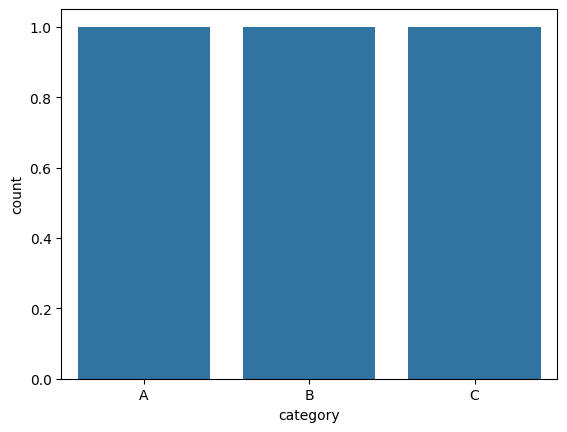

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = [
    {'category': 'A', 'count': 10},
    {'category': 'B', 'count': 15},
    {'category': 'C', 'count': 5}
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Create the countplot
sns.countplot(data=df, x='category')
plt.show()


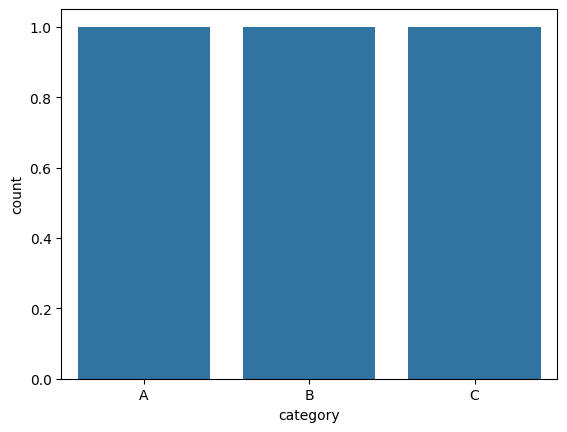

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data as a list of dictionaries
data = [
    {'category': 'A', 'count': 10},
    {'category': 'B', 'count': 15},
    {'category': 'C', 'count': 5}
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Ensure all values in 'category' column are strings
df['category'] = df['category'].astype(str)

# Ensure all values in 'count' column are integers
df['count'] = df['count'].astype(int)

# Create the countplot
sns.countplot(data=df, x='category')
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example data as a list of lists or a DataFrame
data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Convert the list to a NumPy array or DataFrame
data = np.array(data)  # or pd.DataFrame(data)

# If it's already a DataFrame, make sure it's numeric
df = pd.DataFrame(data, columns=['A', 'B', 'C'])

# Check the initial data
print("Original Data:")
print(df)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert back to DataFrame if needed
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Check the scaled data
print("Scaled Data:")
print(scaled_df)


Original Data:
   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
Scaled Data:
          A         B         C
0 -1.224745 -1.224745 -1.224745
1  0.000000  0.000000  0.000000
2  1.224745  1.224745  1.224745


In [31]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Determine number of components for 90-95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
components = np.where(cumulative_variance >= 0.90)[0][0] + 1
print(f"Number of components for 90-95% variance: {components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=components)
pca_data = pca.fit_transform(scaled_data)


Number of components for 90-95% variance: 1


In [33]:
from sklearn.cluster import KMeans
import numpy as np

# Example dataset with only 3 samples
data = np.array([[1, 2], [4, 5], [7, 8]])

# Fit KMeans with fewer clusters (e.g., 2 clusters)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Display the cluster labels
print(kmeans.labels_)


[1 0 0]


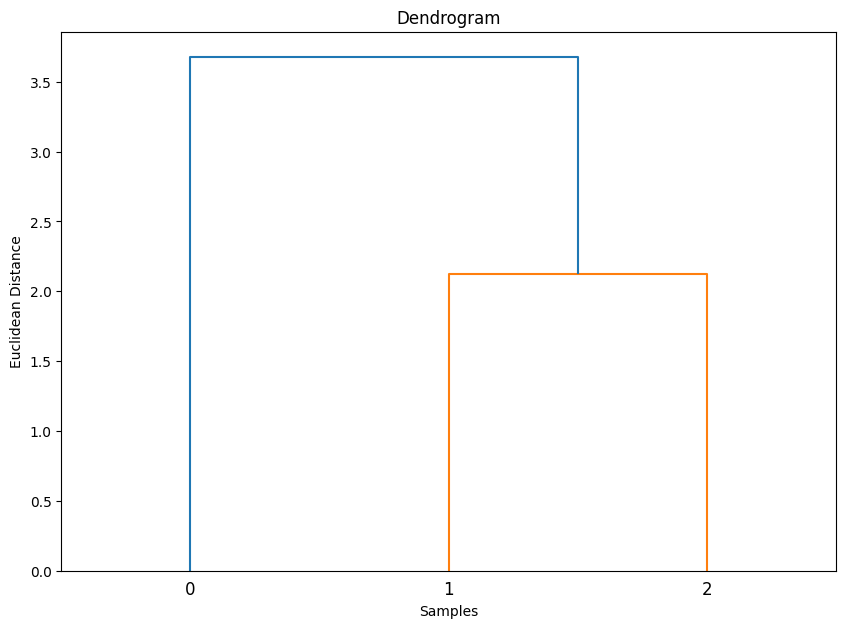

Silhouette Score for K=2: 0.16666666666666674
Optimal K based on silhouette score: 2
Agglomerative Silhouette Score (Optimal K=2): 0.16666666666666674


In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Assuming `pca_data` is your PCA-transformed data
# If not, you should perform PCA on your data first
# pca = PCA(n_components=2)  # Example of performing PCA
# pca_data = pca.fit_transform(your_data)

# Check number of samples in pca_data
n_samples = len(pca_data)

# Find the optimal K value using dendrogram (we'll visualize and inspect this)
plt.figure(figsize=(10, 7))
dendrogram(linkage(pca_data[:1000], method='ward'))  # Using a sample to reduce computation time
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Optionally: Dynamically choose the optimal K based on silhouette scores
best_silhouette = -1  # Placeholder for the best silhouette score
best_k = 2  # Start with a reasonable default for K (e.g., 2)
max_k = min(10, n_samples - 1)  # Ensure K doesn't exceed n_samples - 1

for k in range(2, max_k + 1):  # Test for K = 2 to K = min(10, n_samples-1)
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative_labels = agglomerative.fit_predict(pca_data)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(pca_data, agglomerative_labels)
    print(f"Silhouette Score for K={k}: {silhouette_avg}")
    
    # Update the best K if current silhouette score is better
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

# Use the optimal K determined by silhouette score analysis
print(f"Optimal K based on silhouette score: {best_k}")

# Build Agglomerative clustering model with the optimal K
agglomerative = AgglomerativeClustering(n_clusters=best_k)
agglomerative_labels = agglomerative.fit_predict(pca_data)

# Compute the silhouette score for the final clustering with the optimal K
final_silhouette = silhouette_score(pca_data, agglomerative_labels)
print(f"Agglomerative Silhouette Score (Optimal K={best_k}): {final_silhouette}")


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd

# Assuming `pca_data` is your PCA-transformed data (ensure it's 2D)
# Here we simulate PCA data for demonstration purposes:
# pca_data = np.random.rand(3, 2)  # Example data: 3 samples, 2 components

# Ensure that the number of samples (n_samples) is not smaller than the number of clusters
n_samples = len(pca_data)

# Define the number of clusters for KMeans (ensure it's not larger than n_samples)
kmeans_clusters = min(2, n_samples)  # Adjusting based on the number of samples
kmeans = KMeans(n_clusters=kmeans_clusters)
kmeans_labels = kmeans.fit_predict(pca_data)

# Define the optimal K for Agglomerative Clustering (based on silhouette score analysis)
optimal_k_agg = min(2, n_samples)  # Adjusting based on the number of samples
agglomerative = AgglomerativeClustering(n_clusters=optimal_k_agg)
agglomerative_labels = agglomerative.fit_predict(pca_data)

# Create a DataFrame to hold the PCA data and the cluster labels
# Ensure `pca_data` is a 2D array and the correct number of columns (e.g., 2 components)
if pca_data.ndim == 2:  # Check if pca_data is 2D
    data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])  # Automatically create column names for PCA components

# Add KMeans and Agglomerative labels to the DataFrame
data['kmeans_cluster'] = kmeans_labels
data['agg_cluster'] = agglomerative_labels

# Now you can perform bivariate analysis or visualize these clusters
print(data)

# Optionally: Compute silhouette scores for both clustering methods
if kmeans_clusters > 1:  # Silhouette score requires at least 2 clusters
    kmeans_silhouette = silhouette_score(pca_data, kmeans_labels)
    print(f"KMeans Silhouette Score: {kmeans_silhouette}")
else:
    print("Silhouette score for KMeans cannot be computed with fewer than 2 clusters.")

if optimal_k_agg > 1:  # Silhouette score requires at least 2 clusters
    agg_silhouette = silhouette_score(pca_data, agglomerative_labels)
    print(f"Agglomerative Silhouette Score: {agg_silhouette}")
else:
    print("Silhouette score for Agglomerative Clustering cannot be computed with fewer than 2 clusters.")


       PC1  kmeans_cluster  agg_cluster
0 -2.12132               0            1
1  0.00000               1            0
2  2.12132               1            0
KMeans Silhouette Score: 0.16666666666666674
Agglomerative Silhouette Score: 0.16666666666666674


In [43]:
data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])


In [44]:
if pca_data.ndim == 2:
    data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])


In [45]:
kmeans_clusters = min(4, n_samples)  # Adjusting based on the number of samples
optimal_k_agg = min(4, n_samples)  # Adjusting based on the number of samples


In [48]:
# Save the notebook as HTML
!jupyter nbconvert --to html AnjaliChouhanProject2_PythonforDS.ipynb


[NbConvertApp] Converting notebook AnjaliChouhanProject2_PythonforDS.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 406226 bytes to AnjaliChouhanProject2_PythonforDS.html
